In [1]:
#Declaring libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Declaring the path
path = r'C:\Users\ekpiwhre nwamaka\Downloads\netflix_data.csv'
df = pd.read_csv(path)



## Data Preparation

In [2]:
# Renaming the dataset to "Netflix_shows_movies."
Netflix_shows_movies = df

In [3]:
Netflix_shows_movies.shape

(6234, 12)

In [4]:
#printing the first 5 records
Netflix_shows_movies.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
#checking dataset to understand the structure, data type and non-null count
data_info = Netflix_shows_movies.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [6]:
#Checking for missing values
missing_values = Netflix_shows_movies.isnull().sum()

missing_values

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

## Data Cleaning

Director: 1969 missing values - Seeing that the analysis won't focus on directors, we will replace with a placeholder of 'unknown'

Cast: 570 missing values - The effect of the missing in our analysis is also inconsequential and may also be replaced with the 'unknown' place holder

Country: 476 missing values - We will fill with most common country

Date Added: 11 missing values - We will fill with mode of the most common date added

Rating: 10 missing values -  We will fill with mode of the most common rating

In [7]:
# Filling director with 'Unknown'
Netflix_shows_movies['director'].fillna('Unknown', inplace=True)

# Filling cast with 'Unknown'  
Netflix_shows_movies['cast'].fillna('Unknown', inplace=True)

# Filling country with the most common country
most_common_country = Netflix_shows_movies['country'].mode()[0]
Netflix_shows_movies['country'].fillna(most_common_country, inplace=True)

# Filling date_added with the mode (most common date added)
most_common_date_added = Netflix_shows_movies['date_added'].mode()[0]
Netflix_shows_movies['date_added'].fillna(most_common_date_added, inplace=True)

# Fill rating with the mode (most common rating)
most_common_rating = Netflix_shows_movies['rating'].mode()[0]
Netflix_shows_movies['rating'].fillna(most_common_rating, inplace=True)

In [8]:
# Checking again for  missing values
any_missing_values = Netflix_shows_movies.isnull().sum()
any_missing_values

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Data Exploration

In [9]:
# Descriptive statistics for numerical columns
numerical_summary = Netflix_shows_movies.describe()
numerical_summary

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [10]:
# Descriptive statistics for categorical columns
categorical_summary = Netflix_shows_movies.describe(include=['object'])
categorical_summary

,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234
unique,2,6172,3302,5470,554,1524,14,201,461,6226
top,Movie,The Silence,Unknown,Unknown,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,4265,3,1969,570,2508,133,2037,1321,299,3


In [11]:
# Exploring Categorical columns: 'type'
type_counts = Netflix_shows_movies['type'].value_counts()

type_counts

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [12]:
# Exploring Categorical columns: 'country'
country_counts = Netflix_shows_movies['country'].value_counts()

country_counts.head(5)

United States     2508
India              777
United Kingdom     348
Japan              176
Canada             141
Name: country, dtype: int64

In [13]:
# Exploring Categorical columns: 'rating'
rating_counts = Netflix_shows_movies['rating'].value_counts()

rating_counts.head(5)

TV-MA    2037
TV-14    1698
TV-PG     701
R         508
PG-13     286
Name: rating, dtype: int64

In [14]:
# Checking unique values for certain key columns
unique_shows = Netflix_shows_movies['title'].nunique()
unique_directors = Netflix_shows_movies['director'].nunique()
unique_cast = Netflix_shows_movies['cast'].nunique()

In [15]:
unique_shows, unique_directors, unique_cast

(6172, 3302, 5470)

## Data Visualization

In [16]:
#Splitting the 'listed_in' column where genres are listed as comma-separated values
genres = Netflix_shows_movies['listed_in'].str.split(', ').explode()
genre_counts = genres.value_counts()

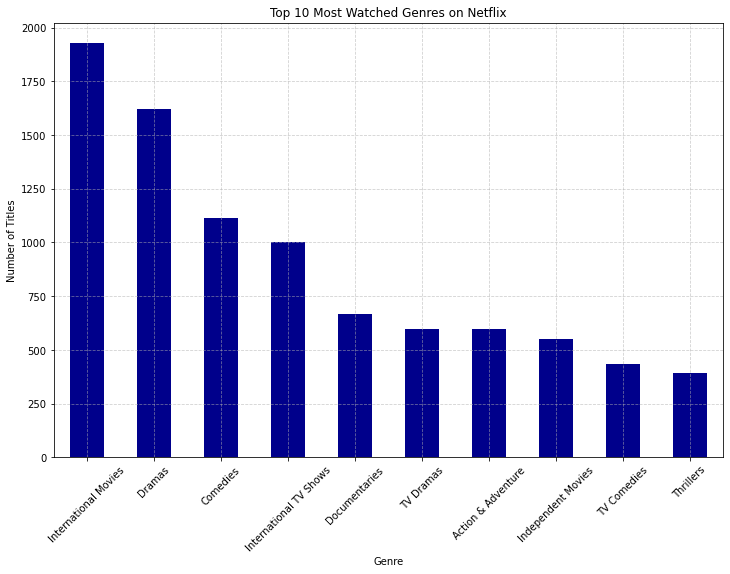

In [19]:
# Visualization for Most watched genres
plt.figure(figsize=(12, 8))
genre_counts.head(10).plot(kind='bar', color='darkblue')
plt.title('Top 10 Most Watched Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

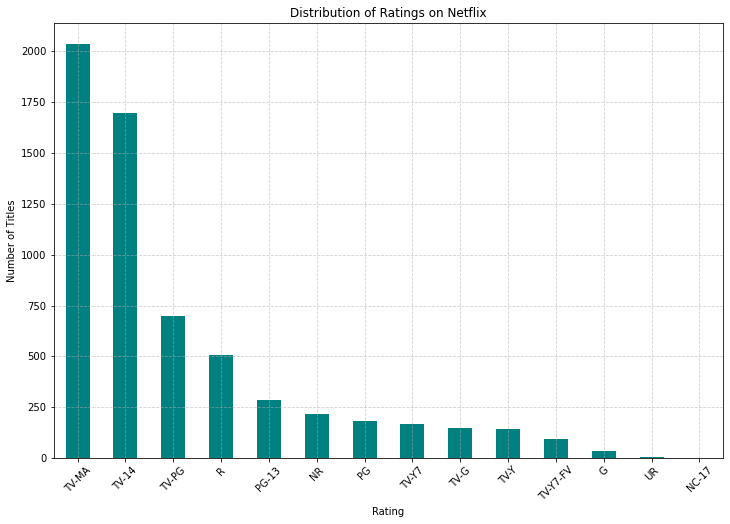

In [20]:
# Preparing data for ratings distribution
ratings_counts = Netflix_shows_movies['rating'].value_counts()

# Creating visualization for ratings distribution
plt.figure(figsize=(12, 8))
ratings_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()